In [2]:
# report owner marketing manager

## steps tp be taken:
''' 1-import the data 2-change the timespan to year and season 3-make a list of the b2b customers and create them
a type 4-make the table and the plot if necassery try to plot it. 5-check the normality 6-check calculate and plot the correlation 7-calculate and scatter 
log and dfferent types of correlation'''


' 1-import the data 2-change the timespan to year and season 3-make a list of the b2b customers and create them\na type 4-make the table and the plot if necassery try to plot it. 5-check the normality 6-check calculate and plot the correlation 7-calculate and scatter \nlog and dfferent types of correlation'

In [18]:
#importing the packages
import pandas as pd 
import numpy as np 
import jalali_pandas
import matplotlib
from scipy.stats import pearsonr 
import matplotlib.pyplot as plt
from matplotlib.pyplot import * 
from bidi.algorithm import get_display
import arabic_reshaper
import streamlit as st

In [2]:
#read the data 
df = pd.read_excel("فروش_1400-05_تا_1403-03-08.xlsx")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73950 entries, 0 to 73949
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   نام کالا                    73950 non-null  object
 1   گروه کالا                   72000 non-null  object
 2   Level_1                     72000 non-null  object
 3   شماره کالا                  73950 non-null  object
 4   کد خارجی                    73802 non-null  object
 5   شماره فاکتور                73950 non-null  object
 6   تاریخ فاکتور                73950 non-null  object
 7   تعداد فروش                  73950 non-null  int64 
 8   فروش خالص پس از کسر مرجوعی  73950 non-null  int64 
 9   نام مشتری                   73950 non-null  object
dtypes: int64(2), object(8)
memory usage: 5.6+ MB


In [3]:
#cleaning the data 
cleaning_data = df.copy()

cleaning_data = cleaning_data[['نام کالا','کد خارجی', 'گروه کالا', 'Level_1',
       'تاریخ فاکتور', 'تعداد فروش', 
       'فروش خالص پس از کسر مرجوعی', 'نام مشتری']]

cleaning_data[cleaning_data['Level_1'].isna()]

cleaning_data[cleaning_data.duplicated(subset=['نام کالا', 'کد خارجی', 'نام مشتری', 'تاریخ فاکتور', 'فروش خالص پس از کسر مرجوعی'],keep=False)]

,نام کالا,کد خارجی,گروه کالا,Level_1,تاریخ فاکتور,تعداد فروش,فروش خالص پس از کسر مرجوعی,نام مشتری
542,کلاغ سرامیکی پافلزی بزرگ - مشکی,1928-2,مجسمه,خانه و دکور,1400/05/31,1,4950000,مشتری گرامی پیام ولی
617,کلاغ سرامیکی پافلزی بزرگ - مشکی,1928-2,مجسمه,خانه و دکور,1400/05/31,1,4950000,مشتری گرامی پیام ولی
1993,پیراهن و کمربند قلمکار دوپود,35875,پوشاک زنانه,مد و پوشاک,1400/06/22,1,8300000,جناب آقای میلاد کسماپور
1999,پیراهن و کمربند قلمکار دوپود,35875,پوشاک زنانه,مد و پوشاک,1400/06/22,1,8300000,جناب آقای میلاد کسماپور
2149,ظرف سرامیکی گرد لبه دار سایز 2 راستین - گل و س...,8922-1,ظرف,خانه و دکور,1400/06/25,1,1450000,سرکار خانم غزاله زرنانی
...,...,...,...,...,...,...,...,...
73773,ظرف سرامیکی-سایز 1 راستین- گل و ستاره,8921-1,ظرف,خانه و دکور,1403/03/05,1,2400000,دپارتمان استور روشا
73774,کاسه سرامیکی سایز4 22-23 cm - چشم نظر ترکیبی,11689-A-5,کاسه,خانه و دکور,1403/03/05,1,13750000,دپارتمان استور روشا
73791,استول - پاف کتان بافته شده بزرگ - زرد,430-A-4,استول,مبلمان,1403/03/05,2,29000000,دپارتمان استور روشا
73799,کاسه سرامیکی سایز4 22-23 cm - چشم نظر ترکیبی,11689-A-5,کاسه,خانه و دکور,1403/03/05,1,13750000,دپارتمان استور روشا


In [4]:
#create the feature seanon
cleaning_data['تاریخ فاکتور'] = cleaning_data['تاریخ فاکتور'].jalali.parse_jalali("%Y/%m/%d")

cleaning_data['فصل'] = cleaning_data['تاریخ فاکتور'].jalali.quarter

cleaning_data['سال'] = cleaning_data['تاریخ فاکتور'].jalali.year

cleaning_data['ماه-سال'] = cleaning_data['سال'].astype(str) + '-' + cleaning_data['فصل'].astype(str)

season_map = {1: "بهار", 2: "تابستان", 3: "پاییز", 4: "زمستان"}

cleaning_data['فصل'] = cleaning_data['فصل'].replace(season_map)



In [5]:
#updating the department
updating_data = cleaning_data.copy()

updating_data['نام کالا']

0                        کاسه سرامیکی چشم طلا سایز 2 - چشم
1                           ظرف سرامیکی برکه سایز 8 - قرمز
2                           ظرف سرامیکی برکه سایز 6 - قرمز
3                                     روسری  - روسری زمانی
4                             بشقاب سرامیکی چشم طلا سایز 7
                               ...                        
73945            اسب سرامیکی طلایی (نیسا) نقش برجسته کوتاه
73946    رومیزی پارچه ای دولایه سوزندوزی ابریشم بلوچستا...
73947    پرنده فلزی - نقره کوب مشبک پابلند - تاج دار دم...
73948    پرنده فلزی نقره کوب دم مشبک کوچک - تاج دار دم ...
73949                          آینه سنگی مهراب طرح 2 زییین
Name: نام کالا, Length: 73950, dtype: object

In [6]:
#grouping the customers into B2C and B2B
B2B = ['مشتری گرامی گالری دیدار', 'جناب آقای علی بردبار', 'جناب آقای  معماریان', 'جناب آقای محمد مهدی  فهلیانی', 'مشتری گرامی گالری دی زی', 'جناب آقای شایگان', 'سرکار خانم لیلی بهمن', 'جناب آقای Tubai Tappeti', 'جناب آقای امیر شکوری', 'جناب آقای مارکوس شریعت', 'مشتری گرامی Hana haji hassan', 'مشتری گرامی شرکت توسعه فن آوران بهین فردا چراغچی', 'جناب آقای بهرنگ انصاری پور', 'سرکار خانم راحله فخاری', 'جناب آقای افشین اسماعیلی']

updating_data[updating_data['نام مشتری'].isin(B2B)]['نام مشتری'].unique()

updating_data.loc[(updating_data['نام مشتری'].isin(B2B)) | (updating_data['نام مشتری'].str.contains('Hana haji')), 'نوع مشتری'] = 'B2B'

updating_data['نوع مشتری'] = updating_data['نوع مشتری'].fillna('B2C')

In [7]:
#updating_data
updating_data = updating_data.copy()

updating_data = updating_data.rename(columns={"Level_1":"دپارتمان"})



In [8]:
pd.set_option('display.max_rows', 10)

updating_data[updating_data['دپارتمان'].isna()]

updating_data.loc[updating_data['نام کالا']=='هزینه ارسال کالا', 'دپارتمان'] = 'خدمات'

updating_data.loc[updating_data['نام کالا']=='تعمیرات', "دپارتمان"] = 'خدمات'

updating_data.loc[updating_data['نام کالا']=='خدمات تعمیر کالا', 'دپارتمان'] = 'خدمات'


decoration_variables = ['پرنده', 'انار', 'کاسه','ظرف','پارچه','پیش','دیس','مرغ','بشقاب','کلاغ',
                        'مجسمه','کوسن','دیوارکوب','گلدان','تشک', 'خروس','آینه','فنجان','رانر',
                        'زیر','رومیزی','قاشق','چنگال','قندان','کبوتر','زیربشقاب','لیوان','سینی',
                        'نعلبکی','جعبه','نمکدان', 'گاو', 'اسب', 'دستمال','گلابی', 'کوزه', 'سبد', 'سفره', 
                        'شیر','شیشه','بطری', 'ماگ', 'سیب','لحاف', "جاشمعی", "شکردان", "صابون", "کیسه", "اسفنکس", "تشک", "آباژور"]

updating_data.loc[(updating_data["نام کالا"].str.contains("|".join(decoration_variables)))&(updating_data['دپارتمان'].isna()), "دپارتمان"] = "خانه و دکور"

fashion_variables =['کیف','بند','روسری','شال','کلاچ','گیوه','جواهرات','نشان', 'بادبزن', "کلاه","تیشرت", "گوشواره", "پوشاک","بلوز", "پاپیون", "کفش", "روبان", "کت", "منگوله", "سویشرت", "کوله پشتی", "تی شرت", "عینک", "انگشتر", "سنجاق", "اسکارف"
                     ,"حوله", "گل سینه", "النگو", "جلیقه", "مانتو", "تاپ", "گوشوراه", "کراس بادی", "شلوار", "آویز", "شانه", "جا شمعی",
                     "پوشت","دکمه","سرآستین"]

updating_data.loc[(updating_data["نام کالا"].str.contains("|".join(fashion_variables)))&(updating_data['دپارتمان'].isna()), "دپارتمان"] = "مد و پوشاک"


In [9]:
updating_data

,نام کالا,کد خارجی,گروه کالا,دپارتمان,تاریخ فاکتور,تعداد فروش,فروش خالص پس از کسر مرجوعی,نام مشتری,فصل,سال,ماه-سال,نوع مشتری
0,کاسه سرامیکی چشم طلا سایز 2 - چشم,12672-2,کاسه,خانه و دکور,1400-05-13 00:00:00,1,3000000,مشتری گرامی میترا اصلانیان,تابستان,1400,1400-2,B2C
1,ظرف سرامیکی برکه سایز 8 - قرمز,11891-3,ظرف,خانه و دکور,1400-05-13 00:00:00,1,2850000,سرکار خانم مهناز موسی خانی,تابستان,1400,1400-2,B2C
2,ظرف سرامیکی برکه سایز 6 - قرمز,11510-4,ظرف,خانه و دکور,1400-05-13 00:00:00,1,3500000,سرکار خانم مهناز موسی خانی,تابستان,1400,1400-2,B2C
3,روسری - روسری زمانی,22493,شال و روسری,مد و پوشاک,1400-05-13 00:00:00,1,1950000,مشتری گرامی مهسا صادق,تابستان,1400,1400-2,B2C
4,بشقاب سرامیکی چشم طلا سایز 7,20909,بشقاب,خانه و دکور,1400-05-13 00:00:00,1,10000000,سرکار خانم فاطمه کرد,تابستان,1400,1400-2,B2C
...,...,...,...,...,...,...,...,...,...,...,...,...
73945,اسب سرامیکی طلایی (نیسا) نقش برجسته کوتاه,1569-2,مجسمه,خانه و دکور,1403-03-07 00:00:00,1,65000000,جناب آقای محمدجواد مهدوی,بهار,1403,1403-1,B2C
73946,رومیزی پارچه ای دولایه سوزندوزی ابریشم بلوچستا...,47002-3,رومیزی,خانه و دکور,1403-03-08 00:00:00,1,10800000,دپارتمان استور روشا,بهار,1403,1403-1,B2C
73947,پرنده فلزی - نقره کوب مشبک پابلند - تاج دار دم...,21056-1,مجسمه,خانه و دکور,1403-03-08 00:00:00,1,0,جناب آقای آرش حیدریان,بهار,1403,1403-1,B2C
73948,پرنده فلزی نقره کوب دم مشبک کوچک - تاج دار دم ...,2134-1,مجسمه,خانه و دکور,1403-03-08 00:00:00,1,0,جناب آقای آرش حیدریان,بهار,1403,1403-1,B2C


In [9]:
B2BB2C_price = updating_data.groupby(['ماه-سال', 'نوع مشتری'])['فروش خالص پس از کسر مرجوعی'].sum().reset_index()

B2BB2C_count = updating_data.groupby(['ماه-سال', 'نوع مشتری'])['تعداد فروش'].sum().reset_index()


In [10]:

B2B_count = B2BB2C_count[B2BB2C_count['نوع مشتری']=="B2B"]["تعداد فروش"]

B2C_count = B2BB2C_count[B2BB2C_count['نوع مشتری']=="B2C"]["تعداد فروش"]

B2C_price = B2BB2C_price[B2BB2C_price['نوع مشتری']=="B2C"]

B2B_price = B2BB2C_price[B2BB2C_price['نوع مشتری']=="B2B"]




In [12]:
pearsonr(B2B_count, B2C_count)

PearsonRResult(statistic=0.36088183503196186, pvalue=0.24912656889581125)

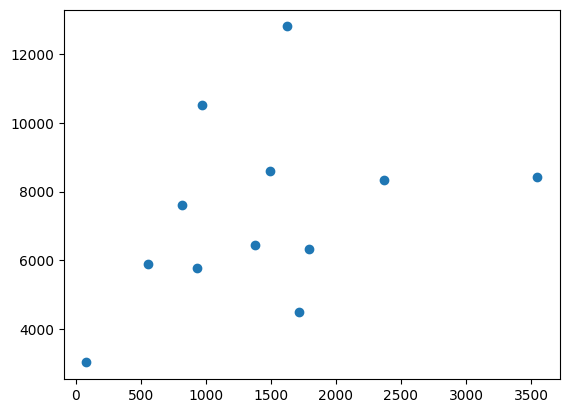

In [11]:
# 6
#create scatter 
plt.scatter(B2B_count, B2C_count)


In [12]:
total_sales_log = np.log(updating_data['فروش خالص پس از کسر مرجوعی']).diff()

c:\quera\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\quera\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
len(B2B_count)

12

In [16]:
print(B2B_count.max(), B2B_count.min(), B2B_count.mean(), B2B_count.std(), np.std(B2B_count)/ np.mean(B2B_count)*100)

3546 81 1440.8333333333333 906.1573045592364 60.21373514931837


In [17]:
print(B2C_count.max(), B2C_count.min(), B2C_count.mean(), B2C_count.std(), np.std(B2C_count)/np.mean(B2C_count)*100)

12811 3016 7355.583333333333 2649.9433427333815 34.49254090907883


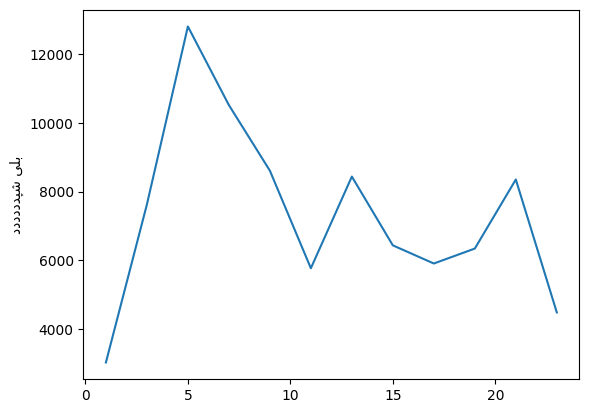

In [16]:
plt.plot(B2C_count)
plt.ylabel(font)

plt.show()


In [19]:
len(B2C_count)

12

In [20]:
len(B2C_count)

12

In [14]:
def make_farsi_text(x):
      reshaped_text = arabic_reshaper.reshape(x)
      farsi_text = get_display(reshaped_text)
      return farsi_text

font_title = {'family': 'B Farnaz',
'color': 'red',
'weight': 'normal',
'size': 30,
}

font_labels = {'family': 'B Nazanin',
'color': 'black',
'weight': 'normal',
'size': 20,
}

In [15]:
font = make_farsi_text('')
xticks()

In [19]:
st.write('wow')

2024-06-07 14:33:38.330 
  command:

    streamlit run c:\quera\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
